In [1]:
# Imports
from PIL import Image
import glob, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convert_to_gray_scale(path, grayfilename):
    # Defining the local variable
    global image
    
    # Opens a color image
    image = Image.open(path)

    # Shows the width and height of the image and the color indexing mode
    print image.size, image.mode

    # Converting the image to grayscale
    print '\nConverting...'

    # Converts the color image to grayscale
    image = image.convert("L")

    # Shows the width and height of the image and the color indexing mode
    print image.size, image.mode

    # Save the image
    print("\nImage "+str(grayfilename)+" save")
    image.save(grayfilename)

In [3]:
def plot(path):
    # Defining the local variable
    global rel_freq

    # Returns the absolute frequency of the image
    abs_freq = image.histogram()
    # print'\nAbsolute Frequency:',abs_freq

    # row and column receive their respective size
    row, column = image.size

    # Total size of the array (image)
    total_size = row * column

    # Divide each item by the total size and obtain the relative frequency
    rel_freq = [(float(item) / total_size) * 100 if item else 0 for item in abs_freq]
    # print'\nRelative Frequency:',rel_freq
    # print'\nCheck:',sum(rel_freq)

    # It receives a vector with 255 positions (0 to 255)
    bins = np.array(range(256))
    # print'\nBins:',bins

    # Transforms the image into an array
    matrix = np.asarray(image)
    # print'\nMatrix:',matrix

    fig = plt.figure()

    fig.add_subplot(221)

    # Plot the image
    plt.axis("off") # x-axis and y-axis off
    plt.imshow(matrix, cmap='gray', vmin = 0, vmax = 255)

    fig.add_subplot(222)

    # Plot the histogram
    plt.title("Histogram")
    plt.xlim(0,255) # Set x-axis limits
    plt.ylim()      # Set y-axis limits
    plt.xlabel("Bins")
    plt.ylabel("Relative Frequency %")
    plt.bar(bins, rel_freq, width=1.0, color='b')
        
    plt.show()

In [4]:
# Store the string entered in the variable directory
directory = raw_input('\nEnter the directory of the image database: ')


Enter the directory of the image database: Images


In [5]:
if not os.path.exists(directory):
    raise Exception('\nThe directory you entered does not exist')
else:    
    # 'Navigate' in the informed directory
    os.chdir(directory)
    print '\nCurrent Directory: ',os.getcwd()


Current Directory:  /home/alexandra/Images


In [6]:
# Creates the directory to store grayscale images
os.mkdir('GrayImages')


----------------------------------------------

Image: 002.jpg
(1024, 768) RGB

Converting...
(1024, 768) L

Image GrayImages/002_gray.jpg save


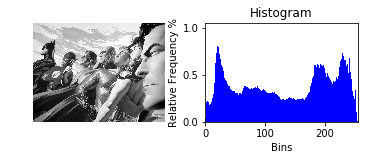


----------------------------------------------

Image: 001.jpg
(1024, 768) RGB

Converting...
(1024, 768) L

Image GrayImages/001_gray.jpg save


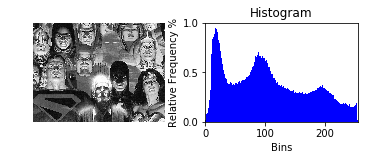


----------------------------------------------

Image: 003.jpg
(1024, 768) RGB

Converting...
(1024, 768) L

Image GrayImages/003_gray.jpg save


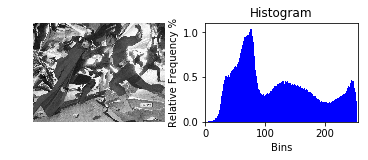


Done!



In [7]:
# Call the functions
for fn in glob.glob('*.jpg'):
    print'\n----------------------------------------------'
    print '\nImage:',fn

    # Gets the file name without the extension
    f = glob.os.path.splitext(fn)[0]

    # Converts images in grayscale and saves them in GrayImages directory
    convert_to_gray_scale(fn, 'GrayImages/' + f + '_gray.jpg')

    # Plots the image and its histogram
    plot(fn)
    
print '\nDone!\n'